```yaml
---
title: "Example on how to apply TextImage Augmentation"
description: "An example of using Albumentations to add text to an image, featuring Mooze and Meeko"
image: "images/cats.jpg"
---
```

# Example on how to write on top of images

Note:
- Code for the transform is based on the code from [https://github.com/danaaubakirova/doc-augmentation](https://github.com/danaaubakirova/doc-augmentation) by [Dana Aubakirova](https://www.linkedin.com/in/dana-aubakirova-3220981ab/) 
- Many thanks to Sarah Bieszczad for letting us feature her cats Mooze (small one) and Meeko (the giant) in our project


**Important!**

As input this transform takes bounding boxes in the Albumentations format, which normalized Pascal VOC. I.e.

`bbox = [x_min / width, y_min / height, x_max / width, y_max, height]`

For this transform to work we need to install optional dependency `pillow`

In [ ]:
from __future__ import annotations

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
!pip install -U pillow

In [ ]:
import albumentations as A
import cv2
from matplotlib import pyplot as plt

In [ ]:
def visualize(image):
    plt.figure(figsize=(10, 5))
    plt.axis('off')
    plt.imshow(image)

In [ ]:
bgr_image = cv2.imread("images/cats.jpg")
image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB)

In [ ]:
font_path = "../data/documents/LiberationSerif-Regular.ttf"

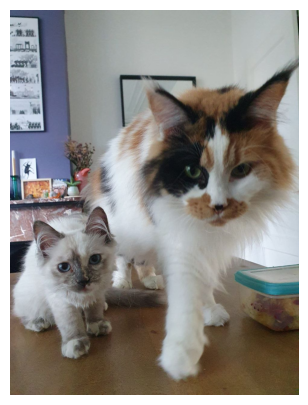

In [ ]:
visualize(image)

## Write text

In [ ]:
transform = A.Compose([A.TextImage(font_path=font_path, p=1, font_color="yellow")])

In [ ]:
metadata = {
    "bbox": [0.15, 0.9, 0.9, 0.98],
    "text": "Mooze and Meeko",
}

In [ ]:
transformed = transform(image=image, textimage_metadata=metadata)

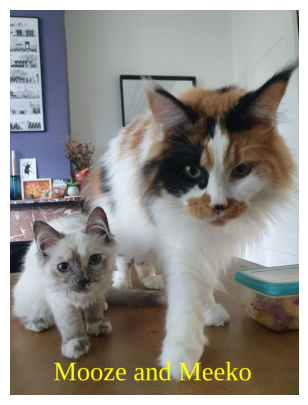

In [ ]:
visualize(transformed["image"])

## Inpaint background
We black out parts of the image where insert text and inpaint them. Could be useful when replacing old text with a new one.

In [ ]:
transform = A.Compose([A.TextImage(font_path=font_path, p=1, font_color=(255, 0, 0), clear_bg=True)])

In [ ]:
metadata = {
    "bbox": [0.1, 0.3, 0.9, 0.38],
    "text": "Dangerous Tigers",
}

In [ ]:
transformed = transform(image=image, textimage_metadata=metadata)

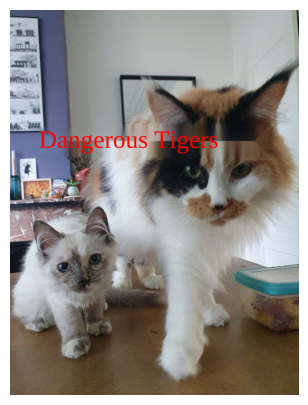

In [ ]:
visualize(transformed["image"])

## Write several lines

In [ ]:
transform = A.Compose([A.TextImage(font_path=font_path, p=1, font_color="black", clear_bg=True)])

In [ ]:
metadata = [{
    "bbox": [0.02, 0.1, 0.95, 0.17],
    "text": "Big dreams in small packages...",
},
            {
    "bbox": [0.02, 0.85, 0.95, 0.91],
    "text": "...and even bigger in bigger ones."}
           ]

In [ ]:
transformed = transform(image=image, textimage_metadata=metadata)

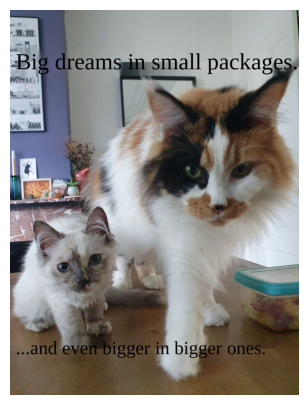

In [ ]:
visualize(transformed["image"])

## Augment text

We can insert text as is, or augment it on the fly.

### Swap words

In [ ]:
transform = A.Compose([A.TextImage(font_path=font_path, p=1, font_color="white", augmentations=["swap"])])

In [ ]:
metadata = [{
    "bbox": [0.02, 0.1, 0.95, 0.16],
    "text": "Big dreams in small packages...",
},
            {
    "bbox": [0.02, 0.85, 0.95, 0.91],
    "text": "...and even bigger in bigger ones."}
           ]

In [ ]:
transformed = transform(image=image, textimage_metadata=metadata)

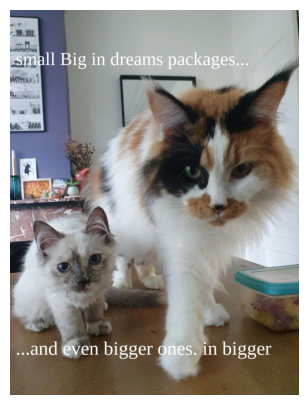

In [ ]:
visualize(transformed["image"])

### Random Deletion

In [ ]:
transform = A.Compose([A.TextImage(font_path=font_path, p=1, font_color="red", augmentations=["deletion"])])

In [ ]:
metadata = [{
    "bbox": [0.02, 0.1, 0.95, 0.16],
    "text": "Growing up with a giant...",
},
            {
    "bbox": [0.02, 0.85, 0.95, 0.91],
    "text": "...is always an adventure.."}
           ]

In [ ]:
transformed = transform(image=image, textimage_metadata=metadata)

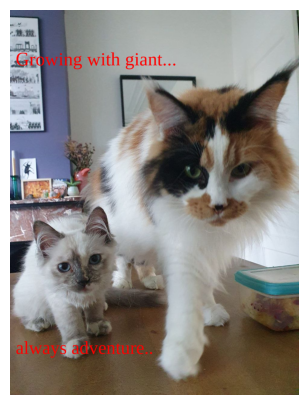

In [ ]:
visualize(transformed["image"])

### Insert random stopwords

In [ ]:
!pip install nltk

In [ ]:
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vladimiriglovikov/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stops = stopwords.words('english')

In [ ]:
transform = A.Compose([A.TextImage(font_path=font_path, p=1, font_color="white", augmentations=["insertion"], stopwords=stops)])

In [ ]:
metadata = {
    "bbox": [0.15, 0.9, 0.9, 0.95],
    "text": "Mooze and Meeko",
}

In [ ]:
transformed = transform(image=image, textimage_metadata=metadata)

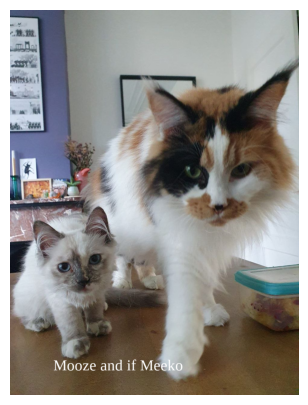

In [ ]:
visualize(transformed["image"])

## Returning augmented text

If you need text that was added to the image after "swap", "insertion" or "deletion" you may get it with: 

In [ ]:
transform = A.Compose([A.TextImage(font_path=font_path, p=1, font_color="white", augmentations=["insertion", "swap"], stopwords=stops)])

In [ ]:
metadata = [{
    "bbox": [0.02, 0.1, 0.95, 0.16],
    "text": "Big dreams in small packages...",
},
            {
    "bbox": [0.02, 0.85, 0.95, 0.91],
    "text": "...and even bigger in bigger ones."}
           ]

In [ ]:
transformed = transform(image=image, textimage_metadata=metadata)

In [ ]:
transformed["overlay_data"]

[{'bbox_coords': (19, 1088, 912, 1164),
  'text': '...and in bigger even bigger ones.',
  'font_color': 'white'},
 {'bbox_coords': (19, 128, 912, 204),
  'text': "Big dreams in small wasn't shan packages...",
  'font_color': 'white'}]